**Run the following two cells before you begin.**

In [153]:
%autosave 10

Autosaving every 10 seconds


In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [156]:
# Import data set
import pandas as pd
import matplotlib.pyplot as plt
# Import the dataset
df_train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [157]:
# Create features list
X = df_train[['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
              'PAY_AMT5', 'PAY_AMT6']]
y = df_train['default payment next month']

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [158]:
import random
random.seed(24)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [159]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [160]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga',max_iter = 1000)
classifier.fit(X_train, y_train)
# predictiing the test result
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[4107   97]
 [ 859  270]]


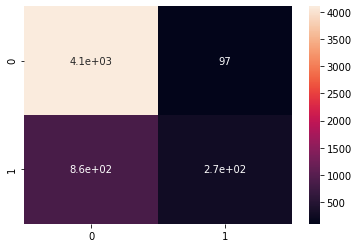

In [161]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test ,y_pred)
print(cm)
import seaborn as sns
sns.heatmap(data=cm,annot =True)


_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [162]:
from sklearn.pipeline import Pipeline
                 
model = Pipeline([('scaler',scalar),('model',classifier)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [163]:
# Use `get_params`
model.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)>

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [164]:
# View what `model__C` is set to currently
model.get_params('model__C')

{'memory': None,
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, d

In [165]:
# Change `model__C` to 2
model.set_params(model__C = 2)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [166]:
c = [1000 , 10 , 1 , 0.1 , 0.01 , 0.001]

In [178]:
C_val_exponents = np.linspace(2,-3,6)
C_val_exponents

array([ 2.,  1.,  0., -1., -2., -3.])

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [167]:
from sklearn.model_selection import KFold, StratifiedKFold
k_folds = StratifiedKFold(n_splits=4, random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [168]:
def cross_val_C_search_pipe(model,c,fc=False):
    model.set_params(model__C = c)
    model.fit(X_train,y_train)
    if (fc):
        print(f"For {model.get_params()['model__C']} predicted proba is:{model.predict_proba(X_test)}")
    return model.predict_proba(X_test)

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [169]:
for i in c: 
    cross_val_C_search_pipe(model,i,fc=True)

For 1000 predicted proba is:[[0.89571466 0.10428534]
 [0.96072536 0.03927464]
 [0.74147428 0.25852572]
 ...
 [0.81812684 0.18187316]
 [0.68628833 0.31371167]
 [0.86591796 0.13408204]]
For 10 predicted proba is:[[0.90670797 0.09329203]
 [0.96088303 0.03911697]
 [0.76269954 0.23730046]
 ...
 [0.83717838 0.16282162]
 [0.72825272 0.27174728]
 [0.87956407 0.12043593]]
For 1 predicted proba is:[[0.92019957 0.07980043]
 [0.95917766 0.04082234]
 [0.78891876 0.21108124]
 ...
 [0.86229377 0.13770623]
 [0.78768128 0.21231872]
 [0.89631238 0.10368762]]
For 0.1 predicted proba is:[[0.90374883 0.09625117]
 [0.93975024 0.06024976]
 [0.77059677 0.22940323]
 ...
 [0.84398479 0.15601521]
 [0.79361177 0.20638823]
 [0.8798312  0.1201688 ]]
For 0.01 predicted proba is:[[0.84405871 0.15594129]
 [0.87173513 0.12826487]
 [0.76062694 0.23937306]
 ...
 [0.79824148 0.20175852]
 [0.78292249 0.21707751]
 [0.83490601 0.16509399]]
For 0.001 predicted proba is:[[0.78742788 0.21257212]
 [0.79619257 0.20380743]
 [0.771

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

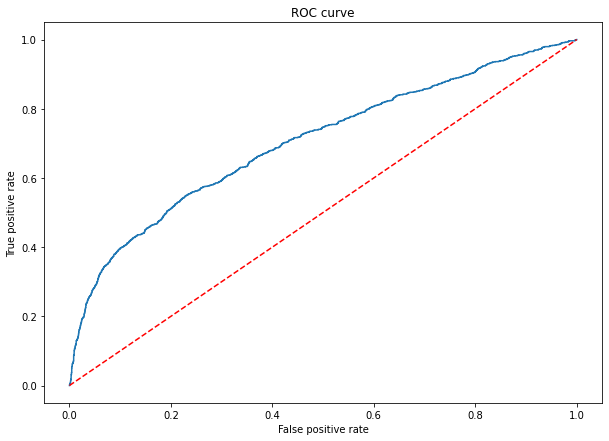

0.7132869998542027


In [170]:
auc = []
for i in range (len(c)):
    Y_predict_proba = cross_val_C_search_pipe(model,c[i])
    fpr,tpr,threshold = roc_curve(y_test,Y_predict_proba[:,1])
    plt.figure(figsize=(10,7))
    auc.append(roc_auc_score(y_test,Y_predict_proba[:,1]))
plt.plot(fpr,tpr,label = 'roc curve')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc = np.mean(auc)
print(auc)

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [171]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X2 = pf.fit_transform(X)
X2

array([[1.0000000e+00, 2.0000000e+04, 2.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2000000e+05, 2.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 4.0000000e+06],
       [1.0000000e+00, 9.0000000e+04, 2.0000000e+00, ..., 1.0000000e+06,
        5.0000000e+06, 2.5000000e+07],
       ...,
       [1.0000000e+00, 3.0000000e+04, 2.0000000e+00, ..., 4.0000000e+06,
        6.2000000e+06, 9.6100000e+06],
       [1.0000000e+00, 8.0000000e+04, 3.0000000e+00, ..., 2.8051853e+09,
        9.5547056e+07, 3.2544160e+06],
       [1.0000000e+00, 5.0000000e+04, 2.0000000e+00, ..., 1.0000000e+06,
        1.0000000e+06, 1.0000000e+06]])

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [172]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y, test_size=0.2, random_state=24)
X2_train.shape , X2_test.shape ,y1_train.shape , y1_test.shape

((21331, 171), (5333, 171), (21331,), (5333,))

In [173]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
def cross_val_C_search_pipe(model,c,fc=False):
    model.set_params(model__C = c)
    model.fit(X1_train,y1_train)
    if (fc):
        print(f"For {model.get_params()['model__C']} predicted proba is:{model.predict_proba(X1_test)}")
    return model.predict_proba(X1_test)

In [174]:
for i in c: 
    cross_val_C_search_pipe(model,i,fc=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


For 1000 predicted proba is:[[0.46022258 0.53977742]
 [0.60091379 0.39908621]
 [0.91104167 0.08895833]
 ...
 [0.90188983 0.09811017]
 [0.58854392 0.41145608]
 [0.39375419 0.60624581]]
For 10 predicted proba is:[[0.46368898 0.53631102]
 [0.61213065 0.38786935]
 [0.91938514 0.08061486]
 ...
 [0.88389541 0.11610459]
 [0.59589693 0.40410307]
 [0.41172269 0.58827731]]
For 1 predicted proba is:[[0.47390793 0.52609207]
 [0.63323618 0.36676382]
 [0.91506508 0.08493492]
 ...
 [0.84933059 0.15066941]
 [0.61206434 0.38793566]
 [0.45261238 0.54738762]]
For 0.1 predicted proba is:[[0.50440894 0.49559106]
 [0.65699815 0.34300185]
 [0.89822596 0.10177404]
 ...
 [0.82258033 0.17741967]
 [0.64073258 0.35926742]
 [0.51554656 0.48445344]]
For 0.01 predicted proba is:[[0.63681391 0.36318609]
 [0.69914725 0.30085275]
 [0.85145462 0.14854538]
 ...
 [0.78716867 0.21283133]
 [0.72969679 0.27030321]
 [0.64021884 0.35978116]]
For 0.001 predicted proba is:[[0.7481888  0.2518112 ]
 [0.75721632 0.24278368]
 [0.796

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

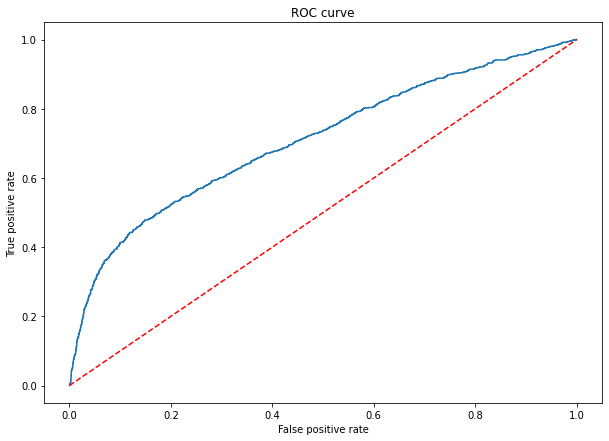

0.723647194781709


In [176]:
# Plot the average training and testing ROC AUC across folds, for each C value.
auc = []
for i in range (len(c)):
    Y_predict_proba = cross_val_C_search_pipe(model,c[i])
    fpr,tpr,threshold = roc_curve(y1_test,Y_predict_proba[:,1])
    plt.figure(figsize=(10,7))
    auc.append(roc_auc_score(y1_test,Y_predict_proba[:,1]))
mean_auc = np.mean(auc)
plt.plot(fpr,tpr,label=r'Mean ROC (AUC = %0.2f)' % (mean_auc))
plt.plot([0,1],[0,1],'r--',label='Guessing')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
print(mean_auc)

In [180]:
fpr

array([0.00000000e+00, 2.39348971e-04, 4.78697942e-04, ...,
       9.98324557e-01, 9.98324557e-01, 1.00000000e+00])

In [181]:
tpr

array([0.       , 0.       , 0.       , ..., 0.9991342, 1.       ,
       1.       ])

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**